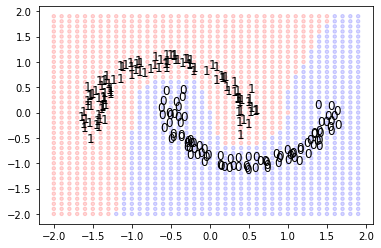

In [1]:
# Programing 1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
data = np.loadtxt('D2z.txt')
data_X = data[:, :-1]
data_Y = data[:, -1]
def euc_distance(a,b):
    return np.sqrt(np.sum((a - b)**2))
def prediction(data_X, data_Y, test_point):
    distances = [euc_distance(x, test_point) for x in data_X]
    index_of_1NN = np.argmin(distances)
    return data_Y[index_of_1NN]
grid_point = np.mgrid[-2:2:0.1, -2:2:0.1].reshape(2, -1).T
grid_label = [prediction(data_X, data_Y, point) for point in grid_point]
colors = [(0.2, 0.2, 1), (1, 0.2, 0.2)]
custom_cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)
plt.scatter(grid_point[:, 0], grid_point[:, 1], c=grid_label, alpha=0.2, cmap=custom_cmap, s=12)
for x, y, label in zip(data_X[:, 0], data_X[:, 1], data_Y):
    plt.text(x, y, str(int(label)), color='black', fontsize=12, ha='center', va='center')


In [2]:
# Programming 2
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
data = pd.read_csv('emails.csv')
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        print(f"'{col}' Column is dropped for being non numeric")
        data = data.drop(col, axis = 1)
x_data = data.drop("Prediction", axis=1).values
y_data = data['Prediction'].values
def prediction(x_train, y_train, x_test):
    y_prediction = []
    for test_email in x_test:
        distances = [np.sqrt(np.sum((test_email - train_email)**2)) for train_email in x_train]
        index_1NN = np.argmin(distances)
        y_prediction.append(y_train[index_1NN])
    return y_prediction
n = len(x_data)
f_size = n//5
for f in range(5):
    all_idx = set(range(n))
    test_idx = set(range(f*f_size, (f+1)*f_size))
    train_idx = all_idx - test_idx
    test_idx = list(test_idx)
    train_idx = list(train_idx)

    x_train, x_test = x_data[train_idx], x_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]
    y_prediction = prediction(x_train, y_train, x_test)
    accuracy = accuracy_score(y_test, y_prediction)
    precision = precision_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction)
    print(f"Accuracy Score: {accuracy}, Precision Score: {precision}, Recall Score: {recall}")

'Email No.' Column is dropped for being non numeric
Accuracy Score: 0.825, Precision Score: 0.6544943820224719, Recall Score: 0.8175438596491228
Accuracy Score: 0.853, Precision Score: 0.6857142857142857, Recall Score: 0.8664259927797834
Accuracy Score: 0.862, Precision Score: 0.7212121212121212, Recall Score: 0.8380281690140845
Accuracy Score: 0.851, Precision Score: 0.7164179104477612, Recall Score: 0.8163265306122449
Accuracy Score: 0.775, Precision Score: 0.6057441253263708, Recall Score: 0.7581699346405228


In [3]:
# Programming 3
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
data = pd.read_csv('emails.csv')
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        print(f"'{col}' Column is dropped for being non numeric")
        data = data.drop(col, axis = 1)
x_data = data.drop("Prediction", axis=1).values
y_data = data['Prediction'].values
def sigmoid(z):
    return 1/(1+np.exp(-z))
def cross_entropy_loss(x,y,theta):
    f = sigmoid(np.dot(x,theta))
    cross_entropy = (-y).T@np.log(f+1e-6) - (1-y).T@np.log(1-f+1e-6)
    return cross_entropy
def gradient_descent(x, y, step_size = 0.01, num_itera = 1000):
    m,n = x.shape
    theta = np.zeros(n)
    for itera in range(num_itera):
        gradient = (x.T @ (sigmoid(np.dot(x,theta))-y))/m
        theta = theta - step_size * gradient
    return theta
def prediction(x, theta):
    proba = sigmoid(np.dot(x,theta))
    return [1 if p >=0.5 else 0 for p in proba]

n = len(x_data)
f_size = n//5
for f in range(5):
    all_idx = set(range(n))
    test_idx = set(range(f*f_size, (f+1)*f_size))
    train_idx = all_idx - test_idx
    test_idx = list(test_idx)
    train_idx = list(train_idx)
    x_train, x_test = x_data[train_idx], x_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]
    theta = gradient_descent(x_train,y_train)
    y_prediction = prediction(x_test, theta)
    accuracy = accuracy_score(y_test, y_prediction)
    precision = precision_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction)
    print(f"Accuracy Score: {accuracy}, Precision Score: {precision}, Recall Score: {recall}")

'Email No.' Column is dropped for being non numeric


/var/folders/wn/tc6b1qtd2_3_6sfb7ll5sjgm0000gn/T/ipykernel_37438/3010335866.py:15: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy Score: 0.915, Precision Score: 0.8875968992248062, Recall Score: 0.8035087719298246


/var/folders/wn/tc6b1qtd2_3_6sfb7ll5sjgm0000gn/T/ipykernel_37438/3010335866.py:15: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy Score: 0.893, Precision Score: 0.8294573643410853, Recall Score: 0.7725631768953068


/var/folders/wn/tc6b1qtd2_3_6sfb7ll5sjgm0000gn/T/ipykernel_37438/3010335866.py:15: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy Score: 0.891, Precision Score: 0.8181818181818182, Recall Score: 0.7922535211267606


/var/folders/wn/tc6b1qtd2_3_6sfb7ll5sjgm0000gn/T/ipykernel_37438/3010335866.py:15: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy Score: 0.834, Precision Score: 0.9266666666666666, Recall Score: 0.47278911564625853


/var/folders/wn/tc6b1qtd2_3_6sfb7ll5sjgm0000gn/T/ipykernel_37438/3010335866.py:15: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy Score: 0.851, Precision Score: 0.79182156133829, Recall Score: 0.696078431372549


In [ ]:
# Programming 4
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
data = pd.read_csv('emails.csv')
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        print(f"'{col}' Column is dropped for being non numeric")
        data = data.drop(col, axis = 1)
x_data = data.drop("Prediction", axis=1).values
y_data = data['Prediction'].values
def k_NN(x_train, y_train, x_test, k):
    y_prediction = []
    for test_email in x_test:
        distances = [np.sqrt(np.sum((test_email - train_email)**2)) for train_email in x_train]
        knn_idx = np.argsort(distances)[:k]
        knn_labels = y_train[knn_idx]
        sum_of_labels = np.sum(knn_labels)
        if sum_of_labels >= k/2:
            y_prediction.append(1)
        else:
            y_prediction.append(0)
    return y_prediction
n = len(x_data)
f_size = n//5
k_values = [1,3,5,7,10]
average_accuracies = []
for k in k_values:
    accuracy_list = []
    for f in range(5):
        all_idx = set(range(n))
        test_idx = set(range(f*f_size, (f+1)*f_size))
        train_idx = all_idx - test_idx
        test_idx = list(test_idx)
        train_idx = list(train_idx)
        x_train, x_test = x_data[train_idx], x_data[test_idx]
        y_train, y_test = y_data[train_idx], y_data[test_idx]
        y_prediction = k_NN(x_train, y_train, x_test, k)
        accuracy = accuracy_score(y_test, y_prediction)
        accuracy_list.append(accuracy)
    average_accuracy = np.mean(accuracy_list)
    average_accuracies.append(average_accuracy)
    print(f"averaga_accuracy is {average_accuracy} for k={k}")
plt.plot(k_values,average_accuracies)
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('kNN 5-Fold Cross Validation')

'Email No.' Column is dropped for being non numeric
averaga_accuracy is 0.8344000000000001 for k=1
averaga_accuracy is 0.841 for k=3


In [ ]:
# Programing 5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
data = pd.read_csv('emails.csv')
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        print(f"'{col}' Column is dropped for being non numeric")
        data = data.drop(col, axis = 1)
x_data = data.drop("Prediction", axis=1).values
y_data = data['Prediction'].values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
def sigmoid(z):
    return 1/(1+np.exp(-z))
def cross_entropy_loss(x,y,theta):
    f = sigmoid(np.dot(x,theta))
    cross_entropy = (-y).T@np.log(f+1e-6) - (1-y).T@np.log(1-f+1e-6)
    return cross_entropy
def gradient_descent(x, y, step_size = 0.01, num_itera = 1000):
    m,n = x.shape
    theta = np.zeros(n)
    for itera in range(num_itera):
        gradient = (x.T @ (sigmoid(np.dot(x,theta))-y))/m
        theta = theta - step_size * gradient
    return theta
def logistic_probability(x, theta):
    return sigmoid(np.dot(x,theta))
def knn_probability(x_train,y_train, x_test, k =5):
    probs = []
    for test_email in x_test:
        distances = [np.sqrt(np.sum((test_email - train_email)**2)) for train_email in x_train]
        knn_idx = np.argsort(distances)[:k]
        knn_labels = y_train[knn_idx]
        prob = np.sum(knn_labels)/k
        probs.append(prob)
    return probs
for_logistic = logistic_probability(x_test, gradient_descent(x_train, y_train))
for_knn = knn_probability(x_train, y_train, x_test)
logis_fpr, logis_tpr,_ = roc_curve(y_test, for_logistic)
logis_auc = auc(logis_fpr, logis_tpr)
knn_fpr, knn_tpr,_ = roc_curve(y_test, for_knn)
knn_auc = auc(knn_fpr, knn_tpr)
plt.plot(knn_fpr,knn_tpr, label = f"knn AUC = {knn_auc}")
plt.plot(logis_fpr, logis_tpr,label = f"logistic AUC = {logis_auc}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Label')
plt.legend(loc='lower right')